In [1]:
import sys
import os

# Add the directory that contains implementations.py
sys.path.append(os.path.abspath(r"../"))

from implementations import *
import numpy as np
import matplotlib.pyplot as plt
from log_helpers import *

In [5]:

# Paths to X and y data
X_path = '..\\data\\x_train.csv'
y_path = '..\\data\\y_train.csv'

# Load the data
X, y = load_csv_data(X_path, y_path, frac=.1)
tx, y = clean_and_standardize(X, y)

### Cross validation

In [6]:
# Set initial parameters
initial_w = np.zeros((tx.shape[1], 1))
max_iters = 200  # Number of iterations
gamma = 1  # Learning rate

# Cross validation
lambdas, losses_tr, losses_te = cross_validation_reg_log(y, tx, 3, np.logspace(-7, 0, 7), max_iters, gamma)

Current iteration=0, loss=0.6931471805599259
Current iteration=100, loss=0.22816587983645098
Lambda=1e-07, Training loss=0.22738470072143804
Current iteration=0, loss=0.693147180559926
Current iteration=100, loss=0.23156967312858426
Lambda=1e-07, Training loss=0.2308492574611267
Current iteration=0, loss=0.6931471805599259
Current iteration=100, loss=0.2331443526695708
Lambda=1e-07, Training loss=0.2324723588890321
Current iteration=0, loss=0.693147180559926
Current iteration=100, loss=0.23239914458887342
Lambda=1.4677992676220705e-06, Training loss=0.2316941737133903
Current iteration=0, loss=0.693147180559926
Current iteration=100, loss=0.23042665783238514
Lambda=1.4677992676220705e-06, Training loss=0.22968327292434385
Current iteration=0, loss=0.693147180559926
Current iteration=100, loss=0.23039289608162355
Lambda=1.4677992676220705e-06, Training loss=0.22967553828670384
Current iteration=0, loss=0.6931471805599257
Current iteration=100, loss=0.23148054840250679
Lambda=2.154434690

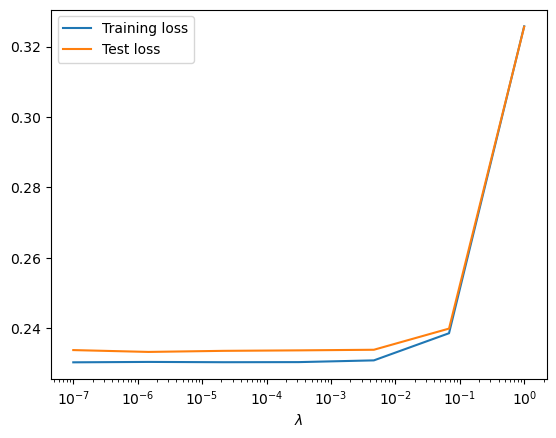

In [7]:
plt.plot(lambdas, losses_tr, label='Training loss')
plt.plot(lambdas, losses_te, label = 'Test loss')
plt.xscale('log')
plt.xlabel('$\lambda$')
plt.legend()
plt.savefig('Hyperparametertuning.png', dpi=369)

In [6]:
newpath = '.\\hyperparam_tuning\\max_iters_400_gamma_1_lams_logspace-7_0_35_k_6' 
save_array_as_csv(lambdas, 'lambdas', newpath)

In [8]:
# Find the best lambda    
best_lambda = lambdas[np.argmin(losses_te)]

In [9]:
best_lambda

1.4677992676220705e-06

### Training with best lambda, extra long!

In [9]:
lambda_ = best_lambda
# Set initial parameters
initial_w = np.zeros((tx.shape[1], 1))
max_iters = 100000  # Number of iterations
gamma = 0.5  # Learning rate

In [10]:
final_w, final_loss = reg_logistic_regression(y, tx, lambda_, initial_w, max_iters, gamma)

Current iteration=0, loss=0.6931471805600689
Current iteration=100, loss=0.22933462271261212
Current iteration=200, loss=0.22658520498308887
Current iteration=300, loss=0.2259742427307593
Current iteration=400, loss=0.22573875701115767
Current iteration=500, loss=0.22561708758832935
Current iteration=600, loss=0.22554202533267337
Current iteration=700, loss=0.22549061271886675
Current iteration=800, loss=0.2254531312434999
Current iteration=900, loss=0.22542469445214572
Current iteration=1000, loss=0.2254025045877077
Current iteration=1100, loss=0.2253848069252999
Current iteration=1200, loss=0.22537043129966303
Current iteration=1300, loss=0.2253585644806532
Current iteration=1400, loss=0.22534862480757661
Current iteration=1500, loss=0.22534018733586605
Current iteration=1600, loss=0.225332936395091
Current iteration=1700, loss=0.22532663419838844
Current iteration=1800, loss=0.22532109941737805
Current iteration=1900, loss=0.22531619221983223
Current iteration=2000, loss=0.225311803

### Safe results

In [92]:
path = '.\\final_results' 
name = 'resuts'
X_path = '..\\data\\x_test.csv'
y, _ = safe_results(final_w, X_path, path, name)